In [235]:
using JuMP, Gurobi, CSV, DataFrames, Plots, StatsPlots, CSV
include("formulation.jl");

### Plottings

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-04
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 514 rows, 504 columns and 2368 nonzeros
Model fingerprint: 0xcf4bcbd1
Variable types: 0 continuous, 504 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [5e+00, 5e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]
Found heuristic solution: objective 1923390.0000
Presolve removed 103 rows and 95 columns
Presolve time: 0.01s
Presolved: 411 rows, 409 columns, 1902 nonzeros
Variable types: 0 continuous, 409 integer (0 binary)
Found heuristic solution: objective 1745390.0000

Root relaxation: objective 1.031664e+06, 105 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumben

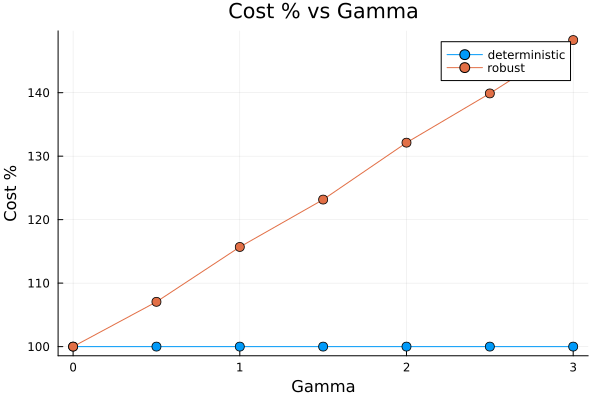

In [201]:
deterministic_cost = []
robust_cost = []

for Gamma in [0,0.5,1,1.5,2,2.5,3]
    a,b,c,d, obj_blue = optimize_red(150)
    a,b,c,d, obj_robust = optimize_red_robust(Gamma, 150)
    push!(deterministic_cost, obj_blue)
    push!(robust_cost, obj_robust)
end

robust_cost = robust_cost./ deterministic_cost[1] .* 100
deterministic_cost = deterministic_cost./ deterministic_cost[1] .* 100

plot([0,0.5,1,1.5,2,2.5,3], deterministic_cost, label="deterministic", xlabel="Gamma", ylabel="Cost %", title="Cost % vs Gamma", marker=(:circle,5))
plot!([0,0.5,1,1.5,2,2.5,3], robust_cost, label="robust", marker=(:circle,5))

In [202]:
x,r,s,u,o = optimize_blue(80)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-04
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 275 rows, 270 columns and 1020 nonzeros
Model fingerprint: 0x501ee38d
Variable types: 0 continuous, 270 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [5e+00, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 51 rows and 47 columns
Presolve time: 0.00s
Presolved: 224 rows, 223 columns, 830 nonzeros
Variable types: 0 continuous, 223 integer (0 binary)
Found heuristic solution: objective 2128220.0000
Found heuristic solution: objective 996595.00000

Root relaxation: objective 4.381350e+05, 77 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent  

([7.0 13.0 … -0.0 -0.0; 1.0 -0.0 … -0.0 -0.0], [0.0 -0.0 … 2.0 1.0; 0.0 2.0 … 12.0 2.0], [1.0 3.0 … 66.0 67.0; 7.0 18.0 … 6.0 5.0], [-0.0 -0.0 … 0.0 0.0; -0.0 -0.0 … -0.0 0.0;;; -0.0 -0.0 … 0.0 0.0; -0.0 -0.0 … 39.0 204.0;;; -0.0 -0.0 … -0.0 0.0; -0.0 -0.0 … -0.0 -0.0;;; … ;;; -0.0 -0.0 … -0.0 0.0; -0.0 -0.0 … -0.0 -0.0;;; -0.0 -0.0 … -0.0 0.0; -0.0 -0.0 … -0.0 -0.0;;; -0.0 -0.0 … -0.0 0.0; -0.0 -0.0 … -0.0 -0.0], 445180.0)

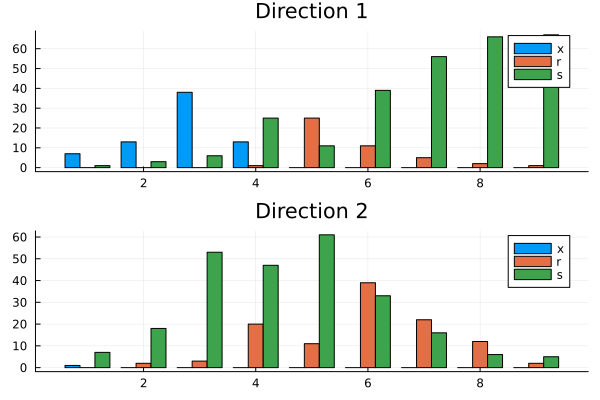

In [203]:
p1 = groupedbar([x[1,:] r[1,:] s[1,:]], label= ["x" "r" "s"], title= "Direction 1")
p2 = groupedbar([x[2,:] r[2,:] s[2,:]], label= ["x" "r" "s"], title= "Direction 2")
plot(p1, p2, layout=(2,1))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-04
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 923 rows, 1135 columns and 3520 nonzeros
Model fingerprint: 0x6f9abfd9
Variable types: 0 continuous, 1135 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [5e+00, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 658 rows and 871 columns
Presolve time: 0.00s
Presolved: 265 rows, 264 columns, 978 nonzeros
Variable types: 0 continuous, 264 integer (0 binary)
Found heuristic solution: objective 3590870.0000
Found heuristic solution: objective 1462650.0000

Root relaxation: objective 5.419517e+05, 83 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

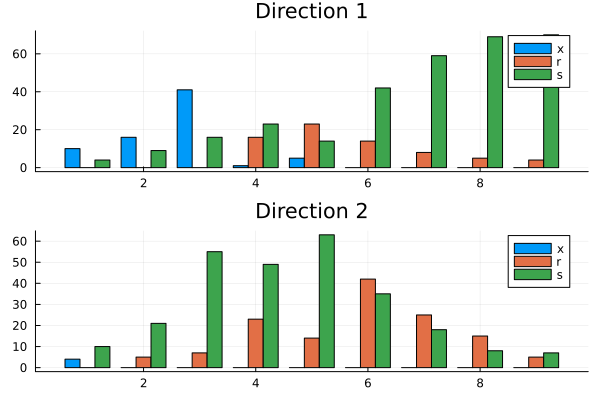

In [225]:
x,r,s,u,o = optimize_blue_robust(1.5, 150)

p1 = groupedbar([x[1,:] r[1,:] s[1,:]], label= ["x" "r" "s"], title= "Direction 1")
p2 = groupedbar([x[2,:] r[2,:] s[2,:]], label= ["x" "r" "s"], title= "Direction 2")
plot(p1, p2, layout=(2,1))

### Tables

In [282]:
s_blue1 = []
x_blue1 = []
r_blue1 = []
num_trains1 = []
s_blue2 = []
x_blue2 = []
r_blue2 = []
num_trains2 =[]
s_blue1_robust = []
x_blue1_robust = []
r_blue1_robust = []
s_blue2_robust = []
x_blue2_robust = []
r_blue2_robust = []


for num_trains in [20, 40, 60, 80]
    x,r,s,u,o = optimize_blue(num_trains)
    for i = 1:9
        push!(s_blue1, s[1,i])
        push!(x_blue1, x[1,i])
        push!(r_blue1, r[1,i])
        push!(num_trains1, num_trains)
        push!(s_blue2, s[2,i])
        push!(x_blue2, x[2,i])
        push!(r_blue2, r[2,i])
        push!(num_trains2, num_trains)
    end
    x,r,s,u,o = optimize_blue_robust(1.5, num_trains)
    for i = 1:9 
        push!(s_blue1_robust, s[1,i])
        push!(x_blue1_robust, x[1,i])
        push!(r_blue1_robust, r[1,i])
        push!(s_blue2_robust, s[2,i])
        push!(x_blue2_robust, x[2,i])
        push!(r_blue2_robust, r[2,i])
    end
end

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-04
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 275 rows, 270 columns and 1020 nonzeros
Model fingerprint: 0x3868e444
Variable types: 0 continuous, 270 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [5e+00, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 51 rows and 47 columns
Presolve time: 0.00s
Presolved: 224 rows, 223 columns, 830 nonzeros
Variable types: 0 continuous, 223 integer (0 binary)
Found heuristic solution: objective 3014390.0000
Found heuristic solution: objective 2927220.0000

Root relaxation: objective 2.211807e+06, 166 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent 

In [283]:
df = DataFrame(
num_trains = [20,20,20,40,40,40,60,60,60,80,80,80],
name = ["s_1", "x_1", "r_1", "s_1", "x_1", "r_1", "s_1", "x_1", "r_1", "s_1", "x_1", "r_1"],
t1 = [s_blue1[1],x_blue1[1],r_blue1[1],s_blue1[10],x_blue1[10],r_blue1[10],s_blue1[19],x_blue1[19],r_blue1[19],s_blue1[28],x_blue1[28],r_blue1[28]],
t2 = [s_blue1[2],x_blue1[2],r_blue1[2],s_blue1[11],x_blue1[11],r_blue1[11],s_blue1[20],x_blue1[20],r_blue1[20],s_blue1[29],x_blue1[29],r_blue1[29]],
t3 = [s_blue1[3],x_blue1[3],r_blue1[3],s_blue1[12],x_blue1[12],r_blue1[12],s_blue1[21],x_blue1[21],r_blue1[21],s_blue1[30],x_blue1[30],r_blue1[30]],
t4 = [s_blue1[4],x_blue1[4],r_blue1[4],s_blue1[13],x_blue1[13],r_blue1[13],s_blue1[22],x_blue1[22],r_blue1[22],s_blue1[31],x_blue1[31],r_blue1[31]],
t5 = [s_blue1[5],x_blue1[5],r_blue1[5],s_blue1[14],x_blue1[14],r_blue1[14],s_blue1[23],x_blue1[23],r_blue1[23],s_blue1[32],x_blue1[32],r_blue1[32]],
t6 = [s_blue1[6],x_blue1[6],r_blue1[6],s_blue1[15],x_blue1[15],r_blue1[15],s_blue1[24],x_blue1[24],r_blue1[24],s_blue1[33],x_blue1[33],r_blue1[33]],
t7 = [s_blue1[7],x_blue1[7],r_blue1[7],s_blue1[16],x_blue1[16],r_blue1[16],s_blue1[25],x_blue1[25],r_blue1[25],s_blue1[34],x_blue1[34],r_blue1[34]],
t8 = [s_blue1[8],x_blue1[8],r_blue1[8],s_blue1[17],x_blue1[17],r_blue1[17],s_blue1[26],x_blue1[26],r_blue1[26],s_blue1[35],x_blue1[35],r_blue1[35]],
t9 = [s_blue1[9],x_blue1[9],r_blue1[9],s_blue1[18],x_blue1[18],r_blue1[18],s_blue1[27],x_blue1[27],r_blue1[27],s_blue1[36],x_blue1[36],r_blue1[36]])

Row,num_trains,name,t1,t2,t3,t4,t5,t6,t7,t8,t9
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,20,s_1,7.0,6.0,14.0,6.0,14.0,6.0,14.0,6.0,13.0
2,20,x_1,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,20,r_1,0.0,7.0,6.0,14.0,6.0,14.0,6.0,14.0,6.0
4,40,s_1,7.0,12.0,28.0,12.0,29.0,12.0,24.0,2.0,1.0
5,40,x_1,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,40,r_1,0.0,7.0,12.0,28.0,11.0,28.0,12.0,24.0,2.0
7,60,s_1,7.0,12.0,45.0,37.0,49.0,22.0,11.0,2.0,1.0
8,60,x_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,60,r_1,0.0,7.0,6.0,21.0,11.0,38.0,22.0,11.0,2.0


In [284]:
CSV.write("tables/blue1.csv", df)

"tables/blue2.csv"

In [285]:
df = DataFrame(
num_trains = [20,20,20,40,40,40,60,60,60,80,80,80],
name = ["s_1", "x_1", "r_1", "s_1", "x_1", "r_1", "s_1", "x_1", "r_1", "s_1", "x_1", "r_1"],
t1 = [s_blue1_robust[1],x_blue1_robust[1],r_blue1_robust[1],s_blue1_robust[10],x_blue1_robust[10],r_blue1_robust[10],s_blue1_robust[19],x_blue1_robust[19],r_blue1_robust[19],s_blue1_robust[28],x_blue1_robust[28],r_blue1_robust[28]],
t2 = [s_blue1_robust[2],x_blue1_robust[2],r_blue1_robust[2],s_blue1_robust[11],x_blue1_robust[11],r_blue1_robust[11],s_blue1_robust[20],x_blue1_robust[20],r_blue1_robust[20],s_blue1_robust[29],x_blue1_robust[29],r_blue1_robust[29]],
t3 = [s_blue1_robust[3],x_blue1_robust[3],r_blue1_robust[3],s_blue1_robust[12],x_blue1_robust[12],r_blue1_robust[12],s_blue1_robust[21],x_blue1_robust[21],r_blue1_robust[21],s_blue1_robust[30],x_blue1_robust[30],r_blue1_robust[30]],
t4 = [s_blue1_robust[4],x_blue1_robust[4],r_blue1_robust[4],s_blue1_robust[13],x_blue1_robust[13],r_blue1_robust[13],s_blue1_robust[22],x_blue1_robust[22],r_blue1_robust[22],s_blue1_robust[31],x_blue1_robust[31],r_blue1_robust[31]],
t5 = [s_blue1_robust[5],x_blue1_robust[5],r_blue1_robust[5],s_blue1_robust[14],x_blue1_robust[14],r_blue1_robust[14],s_blue1_robust[23],x_blue1_robust[23],r_blue1_robust[23],s_blue1_robust[32],x_blue1_robust[32],r_blue1_robust[32]],
t6 = [s_blue1_robust[6],x_blue1_robust[6],r_blue1_robust[6],s_blue1_robust[15],x_blue1_robust[15],r_blue1_robust[15],s_blue1_robust[24],x_blue1_robust[24],r_blue1_robust[24],s_blue1_robust[33],x_blue1_robust[33],r_blue1_robust[33]],
t7 = [s_blue1_robust[7],x_blue1_robust[7],r_blue1_robust[7],s_blue1_robust[16],x_blue1_robust[16],r_blue1_robust[16],s_blue1_robust[25],x_blue1_robust[25],r_blue1_robust[25],s_blue1_robust[34],x_blue1_robust[34],r_blue1_robust[34]],
t8 = [s_blue1_robust[8],x_blue1_robust[8],r_blue1_robust[8],s_blue1_robust[17],x_blue1_robust[17],r_blue1_robust[17],s_blue1_robust[26],x_blue1_robust[26],r_blue1_robust[26],s_blue1_robust[35],x_blue1_robust[35],r_blue1_robust[35]],
t9 = [s_blue1_robust[9],x_blue1_robust[9],r_blue1_robust[9],s_blue1_robust[18],x_blue1_robust[18],r_blue1_robust[18],s_blue1_robust[27],x_blue1_robust[27],r_blue1_robust[27],s_blue1_robust[36],x_blue1_robust[36],r_blue1_robust[36]])

Row,num_trains,name,t1,t2,t3,t4,t5,t6,t7,t8,t9
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,20,s_1,10.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,10.0
2,20,x_1,4.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,20,r_1,0.0,10.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0
4,40,s_1,10.0,14.0,26.0,14.0,26.0,14.0,26.0,8.0,4.0
5,40,x_1,4.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40,r_1,0.0,10.0,14.0,26.0,14.0,26.0,14.0,26.0,8.0
7,60,s_1,10.0,16.0,41.0,34.0,46.0,22.0,14.0,5.0,4.0
8,60,x_1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,60,r_1,0.0,10.0,16.0,24.0,14.0,38.0,22.0,14.0,5.0


In [286]:
CSV.write("tables/blue1_robust.csv", df)

"tables/blue2_robust.csv"